# Zentripetalkraft

In [1]:
from matplotlib import pyplot as plt
from matplotlib import style
from scipy import stats
import numpy as np
import pandas as pd
import glob

class File:

    def __init__(self):
        pass

    def setDateiname(self):
        print("Gefundene Files :" + "\n")
        for name in glob.glob('*.csv'):
            print(name)
        datei = input("\n" + "Dateinamen ohne Endung eingeben: ")
        self.datei = datei + '.csv'
        self.df_mess=pd.read_csv(self.datei, skiprows=3)
        self.df_conds=pd.read_csv(self.datei, skiprows=0, nrows=1)
        
    def getMesswerte(self):
        colnames = []
        for idx,v in enumerate(self.df_mess.columns.values):
            colnames.append(v.split()[0])
        return pd.read_csv(self.datei, names=colnames, skiprows=4)
    
    def getMesswerteMitSpaltennamen(self):
        dimension = self.df_mess.ndim
        colnames = []
        for idx in range(dimension):
            colnames.append(input('Spaltenname angeben: '))
        return pd.read_csv(self.datei, names=colnames, skiprows=1)
            
    
    def getBedingungen(self):
        colnames = []
        for idx,v in enumerate(self.df_conds.columns.values):
            colnames.append(v.split()[0])
        return pd.read_csv(self.datei, names=colnames, skiprows=1, nrows=1)
    
    def getBedingungenMitSpaltennamen(self):
        dimension = self.df_conds.ndim
        colnames = []
        for idx in range(dimension):
            colnames.append(input('Spaltenname angeben: '))
        return pd.read_csv(self.datei, names=colnames, skiprows=1, nrows=1)        
    
    def getDateiname(self):
        return self.datei
    
    def getMesswerteFrame(self):
        return self.df_mess
    
    def getBedingungenFrame(self):
        return self.df_conds
    
    
class Linregress:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.slope, self.intercept, self.r_value, self.p_value, self.std_err = stats.linregress(x, y)
        self.yreg = self.intercept + self.slope*x
        
    def plotLine(self,ax):
        ax.plot(self.x, self.yreg, 'r', label='Regressionsgerade')
        ax.legend()
        
    def getSlope(self):
        return self.slope
    
    def getIntercept(self):
        return self.intercept
    
    def getR(self):
        return self.r_value
    
    def getP(self):
        return self.p_value
    
    def getErr(self):
        return self.std_err        
    
    def getYreg(self):
        return self.yreg
    
class XYDiag:
    def __init__(self,tit,lab,xlab,ylab,x,y):
        self.tit = tit
        self.xlab = xlab
        self.ylab = ylab
        self.lab = lab
        self.x = x
        self.y = y
        fig = plt.figure(figsize=(10,7))
        self.ax = fig.add_subplot(1, 1, 1)
        self.ax.plot(self.x, self.y, '+', label=lab)
        self.ax.set_title(self.tit,y=1.09, fontsize = 15)
        self.ax.set_ylabel(self.ylab)
        self.ax.set_xlabel(self.xlab)
        self.ax.grid(which='major',axis='both')
        self.ax.legend()
        
    def getDiagramm(self):
        return self.ax

## Zentripetalkraft und Winkelgeschwindigkeit

Gefundene Files :

zentripetalkraft_2020_omega.csv
zentripetalkraft_2018_bahnradius.csv
zentripetalkraft_2018_omega.csv
zentripetalkraft_2018_masse.csv

Dateinamen ohne Endung eingeben: zentripetalkraft_2018_omega
Rundenzahl [10]
Anzahl der gemessenen Runden: 10
R =  0.98


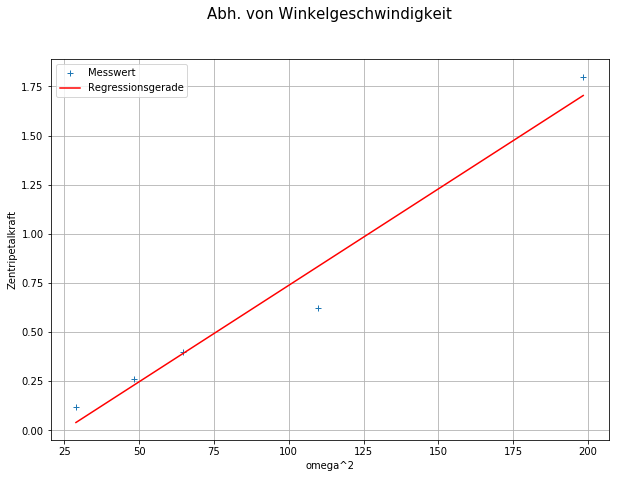

In [6]:
#Einlesen der Messwerte
file = File()
file.setDateiname()
df_mess = file.getMesswerte()

#Winkelgeschwindigkeit
zeit = df_mess["t"]
print(file.getBedingungen().columns[0], file.getBedingungen().get_values()[0])
runden = int(input("Anzahl der gemessenen Runden: "))
zeit_pro_runde = zeit/runden
omega = 2*np.pi/zeit_pro_runde
omega2  = omega**2

#Diagramm
zentripetalkraft = df_mess["F"]
diag = XYDiag("Abh. von Winkelgeschwindigkeit","Messwert","omega^2","Zentripetalkraft",omega2,zentripetalkraft)

#Regression
lr = Linregress(omega2,zentripetalkraft)
lr.plotLine(diag.getDiagramm())
print("R = ",'{:.2f}'.format(lr.getR()))

## Zentripetalkraft und Masse

In [ ]:
#Einlesen der Messwerte
file = File()
file.setDateiname()
df_mess = file.getMesswerte()

#Masse
masse = df_mess["m"]

#Diagramm
zentripetalkraft = df_mess["F"]
diag = XYDiag("Abh. von Masse","Messwert","Masse [kg]","Zentripetalkraft [N]",masse,zentripetalkraft)

#Regression
lr = Linregress(masse,zentripetalkraft)
lr.plotLine(diag.getDiagramm())
print("R = ",'{:.2f}'.format(lr.getR()))

## Zentripetalkraft und Bahnradius

In [ ]:
#Einlesen der Messwerte
file = File()
file.setDateiname()
df_mess = file.getMesswerte()

#Bahnradius
radius = df_mess["r"]

#Diagramm
zentripetalkraft = df_mess["F"]
diag = XYDiag("Abh. von Bahnradius","Messwert","Bahnradius [m]","Zentripetalkraft [N]",radius,zentripetalkraft)

#Regression
lr = Linregress(radius,zentripetalkraft)
lr.plotLine(diag.getDiagramm())
print("R = ",'{:.2f}'.format(lr.getR()))